# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.



In [55]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks 
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.0.dev20220825'

In [106]:
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"
device

'mps'

In [56]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

## y = x^3+2x

In [57]:
# lets make basic backward propagation
# we have an equation that is y = x^3+2x
array = np.array([5])

tensor = torch.Tensor(array)

x = Variable(tensor, requires_grad = True)
y = x**3+2*x
y

tensor([135.], grad_fn=<AddBackward0>)

# Hint grad(y) = 3x^2+2

grad(y,x=5) = 3*5^2+2 = 77

In [58]:

# backward
y.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)
print("real gradient",3*array[0]**2+2)


gradients:  tensor([77.])
real gradient 77


## 1. Data (preparing and loading)



In [59]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [60]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] 

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [61]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  # Show the legend
  plt.legend(prop={"size": 14});

# Method 1

In [109]:
import torch
from torch.autograd import Variable
import torch as tch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot


w = Variable(torch.Tensor([1.0]), requires_grad=True)
b = Variable(torch.Tensor([1.0]), requires_grad=True)
# . On setting .requires_grad = True they start forming a backward graph

def forward(x):
    return x * w+b


def loss_function(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)




# Now running the training loop
for epoch in range(100):
    for x_val, y_val in zip((X_train), (y_train)):
        
        l = loss_function(x_val, y_val)
        
      
        l.backward()
        #print("\tgrad: ", x_val, y_val, w.grad.data[0])
        w.data = w.data - 0.01 * w.grad
        b.data = b.data - 0.01 * b.grad

        # Manually set the gradient to zero after updating weights
        w.grad.data.zero_()
        b.grad.data.zero_()

    if epoch % 10 == 0 :
          print('progress: ', epoch, 'loss' ,l.data)

print('w=',w,'b=',b)

progress:  0 loss tensor([0.1490])
progress:  10 loss tensor([0.0001])
progress:  20 loss tensor([5.2229e-05])
progress:  30 loss tensor([2.5048e-05])
progress:  40 loss tensor([1.2012e-05])
progress:  50 loss tensor([5.7613e-06])
progress:  60 loss tensor([2.7631e-06])
progress:  70 loss tensor([1.3253e-06])
progress:  80 loss tensor([6.3545e-07])
progress:  90 loss tensor([3.0464e-07])
w= tensor([0.7012], requires_grad=True) b= tensor([0.2994], requires_grad=True)


In [63]:
preds =forward(X_test)
preds

tensor([[0.8604],
        [0.8744],
        [0.8885],
        [0.9025],
        [0.9165],
        [0.9305],
        [0.9446],
        [0.9586],
        [0.9726],
        [0.9866]], grad_fn=<AddBackward0>)

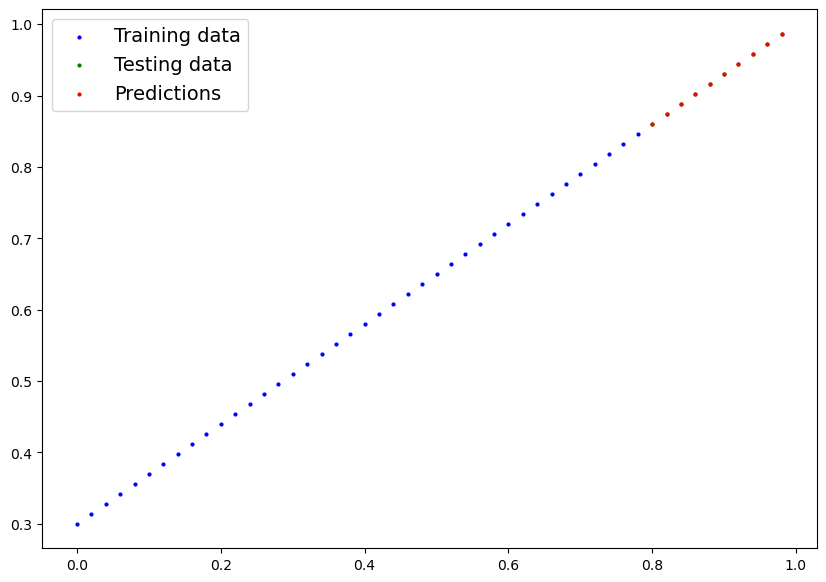

In [138]:
plot_predictions(predictions=preds.detach().numpy() );

# Method 2

In [124]:

# MSE


w = Variable(torch.Tensor([1.0]), requires_grad=True)
b = Variable(torch.Tensor([1.0]), requires_grad=True)
# . On setting .requires_grad = True they start forming a backward grap



def forward(x):
    return x * w+b



# Optimization (find parameters that minimize error)
learning_rate = 0.01   # how fast we reach best parameters

mse = nn.MSELoss()


# Now running the training loop
for epoch in range(200):
        # Forward to get output
         y_pred = forward(X_train)
         
         Loss   = mse(y_pred,y_train)

         Loss.backward()
        #print("\tgrad: ", x_val, y_val, w.grad.data[0])
         w.data = w.data - 0.01 * w.grad
         b.data = b.data - 0.01 * b.grad

        # Manually set the gradient to zero after updating weights
         w.grad.data.zero_()
         b.grad.data.zero_()

         if epoch % 10 == 0 :
            print('progress: ', epoch, 'loss' ,Loss.data)

print('w=',w,'b=',b)
    
      
Loss

progress:  0 loss tensor(0.6723)
progress:  10 loss tensor(0.4205)
progress:  20 loss tensor(0.2630)
progress:  30 loss tensor(0.1645)
progress:  40 loss tensor(0.1029)
progress:  50 loss tensor(0.0644)
progress:  60 loss tensor(0.0403)
progress:  70 loss tensor(0.0252)
progress:  80 loss tensor(0.0158)
progress:  90 loss tensor(0.0099)
progress:  100 loss tensor(0.0062)
progress:  110 loss tensor(0.0039)
progress:  120 loss tensor(0.0024)
progress:  130 loss tensor(0.0015)
progress:  140 loss tensor(0.0009)
progress:  150 loss tensor(0.0006)
progress:  160 loss tensor(0.0004)
progress:  170 loss tensor(0.0002)
progress:  180 loss tensor(0.0001)
progress:  190 loss tensor(9.5610e-05)
w= tensor([0.7125], requires_grad=True) b= tensor([0.3024], requires_grad=True)


tensor(6.4423e-05, grad_fn=<MseLossBackward0>)

## Method 3


In [125]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
    
    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32 
    
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

hint

In [126]:
Weights = torch.distributions.Uniform(0, 0.1).sample((2,))
Weights

tensor([0.0383, 0.0959])

In [127]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
  def __init__(self):
    super().__init__()
   
    weights = torch.distributions.Uniform(0, 0.1).sample((2,))
        # make weights torch parameters
    self.weights = nn.Parameter(weights)    
    
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) :
    w, b = self.weights
    return x*w+b# this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us 
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation 

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html 

In [128]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.0882, 0.0915], requires_grad=True)]

In [129]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.0882, 0.0915]))])

### Making prediction using `torch.inference_mode()`



In [130]:
y_preds = model_0( X_test) )
y_preds

SyntaxError: unmatched ')' (3659918762.py, line 1)

In [131]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
  

# # You can also do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.1621],
        [0.1638],
        [0.1656],
        [0.1674],
        [0.1691],
        [0.1709],
        [0.1727],
        [0.1744],
        [0.1762],
        [0.1780]])

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKavO9iTgwQ-rfri6u7PQ 

In [132]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

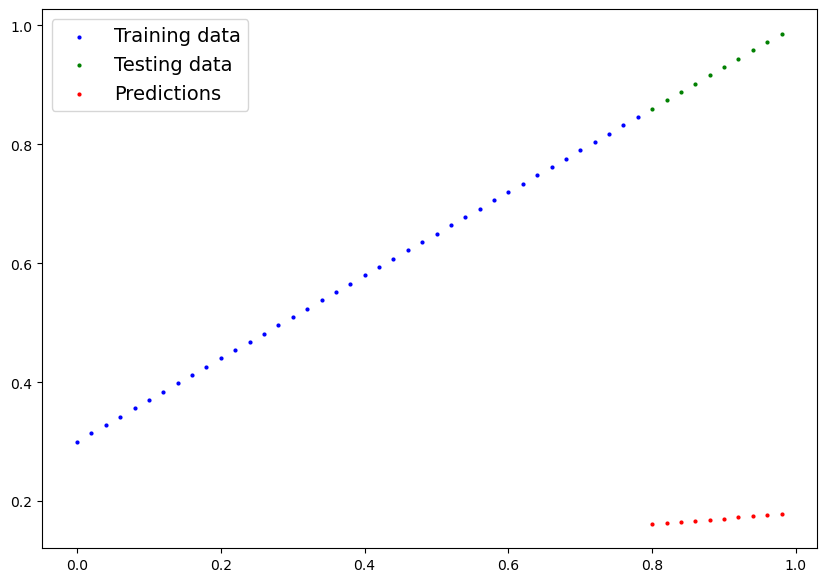

In [133]:
plot_predictions(predictions=y_preds)

## Method 3 --> Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function - https://pytorch.org/docs/stable/optim.html#module-torch.optim
  * Inside the optimizer you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [134]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.0882, 0.0915], requires_grad=True)]

In [135]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.0882, 0.0915]))])

In [136]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), # we want to optimize the parameters present in our model
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch


In [137]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 300

# Track different values
epoch_count = [] 
loss_values = []
test_loss_values = [] 

### Training
# 0. Loop through the data
for epoch in range(epochs): 
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients 

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad() 

  # 4. Perform backpropagation on the loss with respect to the parameters of the model (calculate gradients of each parameter)
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=aftDZicoiUGiklEP179x7A
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass 
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.44709116220474243 | Test loss: 0.7395066618919373
OrderedDict([('weights', tensor([0.0921, 0.1015]))])
Epoch: 10 | Loss: 0.3318810760974884 | Test loss: 0.6047965884208679
OrderedDict([('weights', tensor([0.1311, 0.2015]))])
Epoch: 20 | Loss: 0.21667106449604034 | Test loss: 0.47008657455444336
OrderedDict([('weights', tensor([0.1701, 0.3015]))])
Epoch: 30 | Loss: 0.1352682113647461 | Test loss: 0.35826653242111206
OrderedDict([('weights', tensor([0.2081, 0.3795]))])
Epoch: 40 | Loss: 0.10208861529827118 | Test loss: 0.2847452163696289
OrderedDict([('weights', tensor([0.2413, 0.4235]))])
Epoch: 50 | Loss: 0.08867105096578598 | Test loss: 0.23885920643806458
OrderedDict([('weights', tensor([0.2687, 0.4450]))])
Epoch: 60 | Loss: 0.0822150930762291 | Test loss: 0.2097558081150055
OrderedDict([('weights', tensor([0.2918, 0.4535]))])
Epoch: 70 | Loss: 0.07795460522174835 | Test loss: 0.1906176060438156
OrderedDict([('weights', tensor([0.3122, 0.4545]))])
Epoch: 80 | Loss:

In [138]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.44709116, 0.33188108, 0.21667106, 0.13526821, 0.10208862,
        0.08867105, 0.08221509, 0.07795461, 0.07437216, 0.07088216,
        0.06739216, 0.06395335, 0.06051748, 0.05708854, 0.05364973,
        0.05021555, 0.04678492, 0.04334612, 0.03991362, 0.03648131,
        0.0330425 , 0.02961169, 0.02617769, 0.02273888, 0.01930976,
        0.01587407, 0.01243627, 0.00900782, 0.00557045, 0.00213433],
       dtype=float32),
 [tensor(0.7395),
  tensor(0.6048),
  tensor(0.4701),
  tensor(0.3583),
  tensor(0.2847),
  tensor(0.2389),
  tensor(0.2098),
  tensor(0.1906),
  tensor(0.1789),
  tensor(0.1679),
  tensor(0.1569),
  tensor(0.1486),
  tensor(0.1410),
  tensor(0.1327),
  tensor(0.1245),
  tensor(0.1169),
  tensor(0.1086),
  tensor(0.1003),
  tensor(0.0928),
  tensor(0.0845),
  tensor(0.0762),
  tensor(0.0686),
  tensor(0.0604),
  tensor(0.0521),
  tensor(0.0445),
  tensor(0.0362),
  tensor(0.0286),
  tensor(0.0204),
  tensor(0.0121),
  tensor(0.0045)])

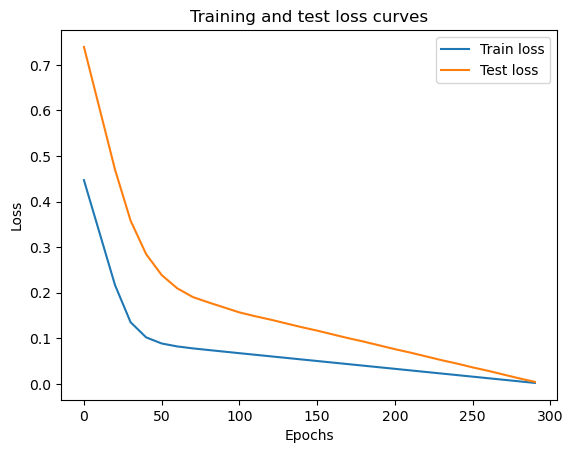

In [93]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [139]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [140]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6975, 0.3085]))])

In [141]:
weight, bias

(0.7, 0.3)

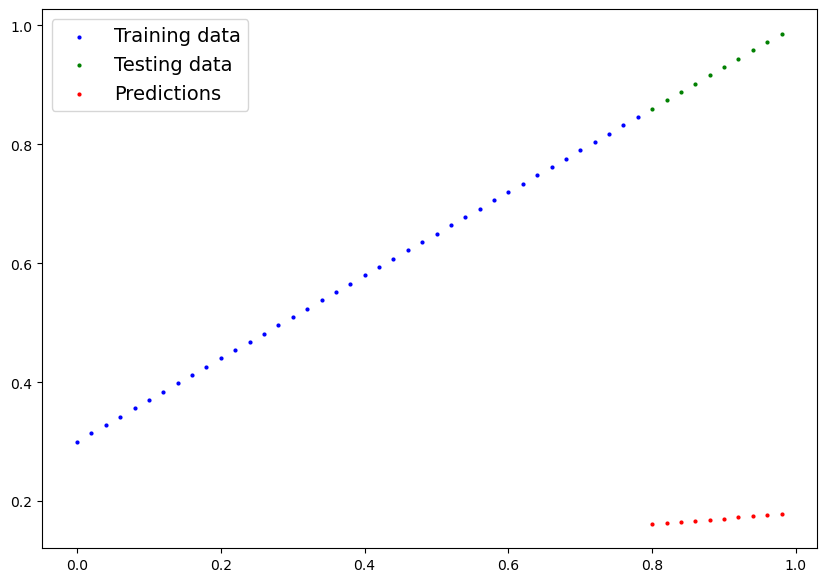

In [142]:
plot_predictions(predictions=y_preds);

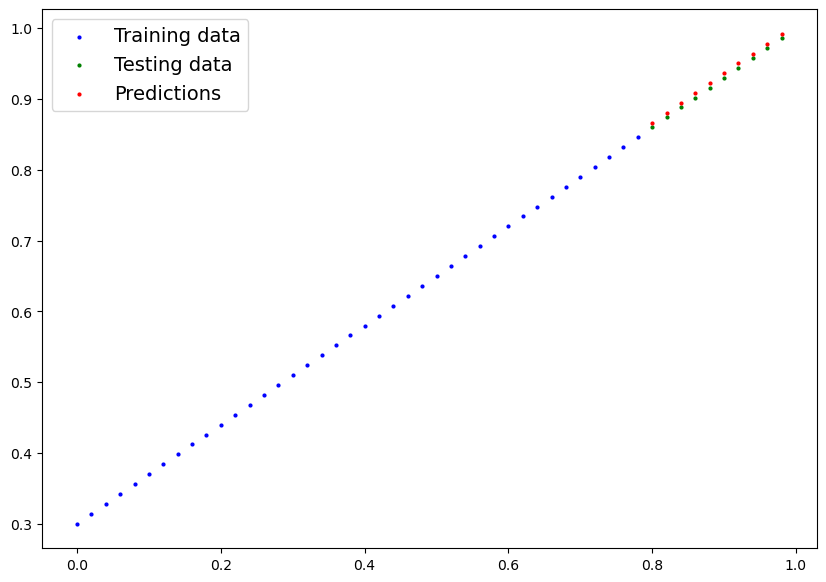

In [143]:
plot_predictions(predictions=y_preds_new);

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format 
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary 

PyTorch save & load code tutorial + extra-curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference

In [144]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [145]:
!ls -l models

total 8
-rw-r--r--  1 tuchsanai  staff  935 Aug 30 19:13 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that. 

In [146]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6975, 0.3085]))])

In [147]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [148]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6975, 0.3085]))])

In [102]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8665],
        [0.8804],
        [0.8944],
        [0.9083],
        [0.9223],
        [0.9362],
        [0.9502],
        [0.9641],
        [0.9781],
        [0.9920]])

In [103]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8665],
        [0.8804],
        [0.8944],
        [0.9083],
        [0.9223],
        [0.9362],
        [0.9502],
        [0.9641],
        [0.9781],
        [0.9920]])

In [104]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [105]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.0.dev20220825'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data 

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  
  # Show the legend
  plt.legend(prop={"size": 14});

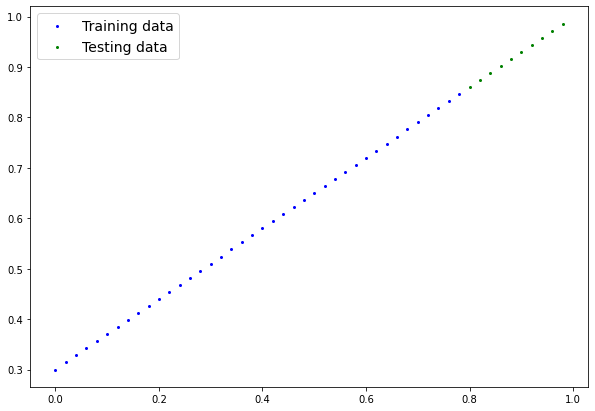

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
model_1.state_dict() 

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data) 
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0: 
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight, bias 

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

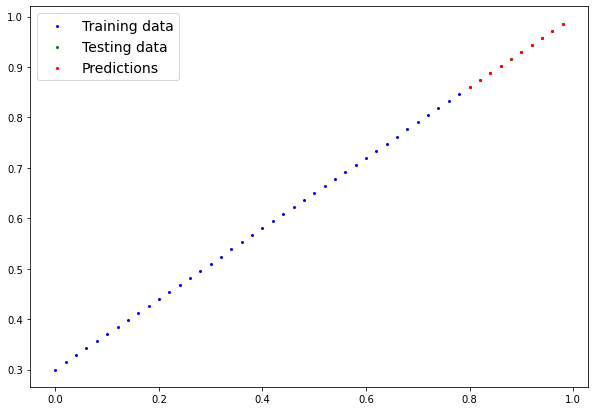

In [ ]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Load a PyTorch model

# Create a new instance of lienar regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')